In [1]:
import networkx as nx

In [2]:
G=nx.Graph()
G.add_nodes_from([i for i in range(744)])

In [3]:
from helpers import load_data, preprocess_data

path_dataset = "movielens100k.csv"
ratings = load_data(path_dataset)

number of items: 1682, number of users: 943


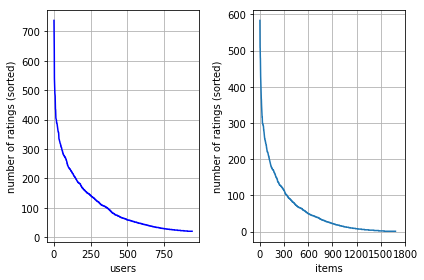

[451 131  90 ...,   1   1   1]


In [4]:
from plots import plot_raw_data
num_items_per_user, num_users_per_item = plot_raw_data(ratings)
print(num_users_per_item)

In [5]:
import numpy as np
valid_users = np.where(num_items_per_user >= 30)[0]
valid_items = np.where(num_users_per_item >= 30)[0]
valid_ratings = ratings[valid_items, :][: , valid_users]  
num_rows, num_cols = valid_ratings.shape
print(num_rows)

806


In [8]:
trainarray=[]
for user in range(num_cols):
    pr=[]
    for mov in range(num_rows):
        pr.append(valid_ratings[mov,user])
    trainarray.append(pr)

In [9]:
def hide(array,num):
    c=0
    hiding=[]
    newarray=np.copy(array)
    index=[]
    x=np.shape(array)[0]
    y=np.shape(array)[1]
    while c<num:
        i=np.random.randint(x) 
        j=np.random.randint(y) 
        u=newarray[i][j]
        if u!=0:
            hiding.append(u)
            index.append([i,j])
            newarray[i][j]=0
            c+=1
    return newarray,hiding,index

In [10]:
hided,a,b=hide(trainarray,9000)

In [211]:
import math
def distance(i,j,arr,valN,G):
    N=0
    dist=0
    arr1=arr[i]
    arr2=arr[j]
    for m in range(len(arr1)):
        if arr1[m]!=0 and arr2[m]!=0:
            dist+=(arr1[m]-arr2[m])**2
            N+=1
    if N>=valN and:
        G.add_edge(i, j, weight=np.sqrt(dist/N))
    return 0

In [212]:
def createGraph(array,valN):
    G=nx.Graph()
    G.add_nodes_from([i for i in range(744)])
    l=0
    for i in range(len(array)):
        if i%100==0:
            print(i)
        for j in range(i+1,len(array)):
            distance(i,j,array,valN,G)
    print(G.number_of_edges())
    return G

In [213]:
def countzero(array):
    l=0
    for i in range(len(array)):
        for j in range(len(array[i])):
            if array[i][j]==0:
                l+=1
    return l

In [222]:
G=createGraph(hided,15)

0
100
200
300
400
500
600
700
130249


In [280]:
ego=nx.ego_graph(G,0,radius=0.9,distance='weight')
print(ego.nodes)

[0, 372, 678]


In [264]:
import time
def computeval(G,arr,rad):
    start = time.time()
    nextarr=[]
    for l in range(len(arr)):
        if l%100==0:
            print(l)
        ego=nx.ego_graph(G,l,radius=rad,distance='weight')
        x=np.shape(arr)[1]
        mean=np.zeros(x)
        n=np.zeros(x)
        egolist=list(ego.adj[l])
        zeros=[]
        for k in range(x):
            if arr[l][k]!=0:
                mean[k]=arr[l][k]
            else:
                zeros.append(k)
        for i in range(len(egolist)):
            moy=arr[egolist[i]]
            for z in zeros:
                if moy[z]!=0:
                        n[z]+=(1/ego[l][egolist[i]]['weight'])
                        mean[z]=mean[z]+(1/ego[l][egolist[i]]['weight'])*(moy[z]**2)
        for z in zeros:     
            if n[z]!=0:
                mean[z]=round(np.sqrt(mean[z]/n[z]))
        nextarr.append(mean)
    end = time.time()
    elapsed = end - start
    print(elapsed)
    return nextarr

In [183]:
arr=hided
M=createGraph(arr,27)


0
100
200
300
400
500
600
700
70988


In [176]:
def compute_err(arr):
    l=0
    n=0
    nextarr=arr
    for bi in range(len(b)):
        if nextarr[b[bi][0]][b[bi][1]]!=0:
            n+=1
            l+=(a[bi]-nextarr[b[bi][0]][b[bi][1]])**2
    print(n)
    print(np.sqrt(l/n))

In [240]:
G=createGraph(hided,25)



0
100
200
300
400
500
600
700
77826


In [265]:
arri=computeval(G,hided,1)
compute_err(arri)

0
100
200
300
400
500
600
700
21.00188899040222
6598
11.9749030274


In [245]:
print(countzero(arri)/countzero(hided))

0.2654096059283353


In [ ]:

0.969526592039